## Leitura do Grafo

In [120]:
def read_graph(file_path):
    adjacency_matrix = []
    adjacency_list = {}
    
    with open(file_path, 'r') as file:
        lines = file.readlines()
        lines.pop(0)
        for i in range(len(lines)):
            lines[i] = lines[i].split()
            lines[i] = [int(x) for x in lines[i]]
        for line in lines:
            adjacency_matrix.append(line)
        for i in range(len(adjacency_matrix)):
            adjacency_list[i] = []
            for j in range(len(adjacency_matrix[i])):
                if adjacency_matrix[i][j] == 1:
                    adjacency_list[i].append(j)
                    
    return adjacency_matrix, adjacency_list

def get_arestas(lista_adj):
    arestas = []
    for vertex1, neighbors in lista_adj.items():
        for vertex2 in neighbors:
            arestas.append((vertex1, vertex2))
    return arestas


In [141]:

adjacency_matrix, adjacency_list = read_graph('grafo.txt')
lista_arestas = get_arestas(adjacency_list)
print("Adjacency Matrix:")
for row in adjacency_matrix:
    print(row)
print("Adjacency List:")
for vertex, neighbors in adjacency_list.items():
    print(f"{vertex}: {neighbors}")
print("Lista de arestas: \n", lista_arestas)


Adjacency Matrix:
[0, 1, 1, 1, 0, 0, 0]
[1, 0, 1, 1, 0, 0, 0]
[1, 1, 0, 1, 1, 1, 0]
[1, 1, 1, 0, 0, 0, 0]
[0, 0, 1, 0, 0, 1, 1]
[0, 0, 1, 0, 1, 0, 1]
[0, 0, 0, 0, 1, 1, 0]
Adjacency List:
0: [1, 2, 3]
1: [0, 2, 3]
2: [0, 1, 3, 4, 5]
3: [0, 1, 2]
4: [2, 5, 6]
5: [2, 4, 6]
6: [4, 5]
Lista de arestas: 
 [(0, 1), (0, 2), (0, 3), (1, 0), (1, 2), (1, 3), (2, 0), (2, 1), (2, 3), (2, 4), (2, 5), (3, 0), (3, 1), (3, 2), (4, 2), (4, 5), (4, 6), (5, 2), (5, 4), (5, 6), (6, 4), (6, 5)]


## Fusão de Vertices

In [138]:
def fusion_vertex(adjacency_list, vertex1, vertex2):
    adjacency_list[vertex1].extend(adjacency_list[vertex2])
    adjacency_list.pop(vertex2)
    while vertex2 in adjacency_list[vertex1]:
        adjacency_list[vertex1].remove(vertex2)
    while vertex1 in adjacency_list[vertex1]:
        adjacency_list[vertex1].remove(vertex1)

    for vertex in adjacency_list:
        for neighbor in adjacency_list[vertex]:
            if neighbor == vertex2:
                adjacency_list[vertex][adjacency_list[vertex].index(neighbor)] = vertex1
    
    return adjacency_list
    

## Algoritmo de Karger

In [139]:
import random
def karger(adjacency_list, edges):
    while len(adjacency_list) > 1:
        # Select a random edge
        vertex1, vertex2 = random.choice(edges)
        
        # Check if vertex1 is already a neighbor of vertex2
        if vertex1 in adjacency_list[vertex2]:
            # Call the fusion_vertex function
            adjacency_list = fusion_vertex(adjacency_list, vertex1, vertex2)
            edges = get_arestas(adjacency_list)

    num_edges = len(edges) 
    num_edges = num_edges / 2 
    return num_edges
    

In [153]:
print(karger(adjacency_list, lista_arestas))

11.0


## Algoritmo Ingênuo

In [125]:
import numpy as np

def ingenuo(lista_adj, arestas):
    vertices = list(lista_adj.keys())
    grupo1 = []
    tam_grupo = np.random.randint(len(vertices))
    for i in range(tam_grupo):
        x = np.random.randint(len(vertices))
        grupo1.append(vertices[x])
        vertices.pop(x)

    solucao = []
    grupo2 = vertices
    for i in range(len(arestas)):
        if ((arestas[i][0] in grupo1) and (arestas[i][1] not in grupo1)) or ((arestas[i][1] in grupo1) and (arestas[i][0] not in grupo1)):
            if (arestas[i][0], arestas[i][1]) not in solucao and (arestas[i][1], arestas[i][0]) not in solucao:
                solucao.append(arestas[i])
                # print("esse aqui é o grupo de vertices 1:",grupo1)
                # print("esse aqui é o grupo de vertices 2:",grupo2)
                # print("essa é a solução: ",ingenuo(solucao))
    return len(solucao)


In [126]:
print(ingenuo(adjacency_list, lista_arestas))

6


## Dicionario de probablidades

In [127]:
def get_prob_n_iter(n_iter, algoritmo, adjacency_list, arestas):
    count_dict = {}
    for j in range (100):
        min_return = float('inf') # Initialize with a large value
        for i in range(n_iter):
            adjacency_matrix, adjacency_list = read_graph('grafo.txt')
            return_value = algoritmo(adjacency_list, arestas)
            if return_value < min_return:
                min_return = return_value
        if min_return not in count_dict:
            count_dict[min_return] = 1
        else:
            count_dict[min_return] += 1

    return count_dict

In [128]:
n_iterr = 6
print("Karger: ", get_prob_n_iter(n_iterr, karger, adjacency_list, lista_arestas))
print("Ingenuo: ", get_prob_n_iter(n_iterr, ingenuo, adjacency_list, lista_arestas))

Karger:  {2.0: 94, 3.0: 6}
Ingenuo:  {3: 21, 0: 64, 5: 1, 2: 12, 6: 1, 4: 1}


# Curvas de probabilidade

### Dados para as curvas

In [129]:
# Dados para as curvas
corte_min = 2
n_iter = 20

# criando a lista
lista_karger = []
lista_ingenuo = []
for i in range(1, n_iter+1):
    print("iter: ", i)
    prob_karger = get_prob_n_iter(i, karger, adjacency_list, lista_arestas)
    prob_ingenuo = get_prob_n_iter(i, ingenuo, adjacency_list, lista_arestas)
    
    print(f"Karger: {prob_karger[corte_min]}")
    print(f"ingenuo: {prob_ingenuo[corte_min]}")

    lista_karger.append(prob_karger[corte_min])
    lista_ingenuo.append(prob_ingenuo[corte_min])

print(lista_karger)
print(lista_ingenuo)


iter:  1
Karger: 41
ingenuo: 4
iter:  2
Karger: 58
ingenuo: 9
iter:  3
Karger: 72
ingenuo: 11
iter:  4
Karger: 88
ingenuo: 17
iter:  5
Karger: 96
ingenuo: 11
iter:  6
Karger: 94
ingenuo: 12
iter:  7
Karger: 97
ingenuo: 12
iter:  8
Karger: 97
ingenuo: 13
iter:  9
Karger: 99
ingenuo: 10
iter:  10
Karger: 99
ingenuo: 9
iter:  11
Karger: 98
ingenuo: 8
iter:  12
Karger: 100
ingenuo: 9
iter:  13
Karger: 100
ingenuo: 9
iter:  14
Karger: 100
ingenuo: 16
iter:  15
Karger: 100
ingenuo: 4
iter:  16
Karger: 100
ingenuo: 3
iter:  17
Karger: 100
ingenuo: 1
iter:  18
Karger: 100
ingenuo: 5
iter:  19
Karger: 100
ingenuo: 5
iter:  20
Karger: 100
ingenuo: 2
[41, 58, 72, 88, 96, 94, 97, 97, 99, 99, 98, 100, 100, 100, 100, 100, 100, 100, 100, 100]
[4, 9, 11, 17, 11, 12, 12, 13, 10, 9, 8, 9, 9, 16, 4, 3, 1, 5, 5, 2]


### Plot do grafico

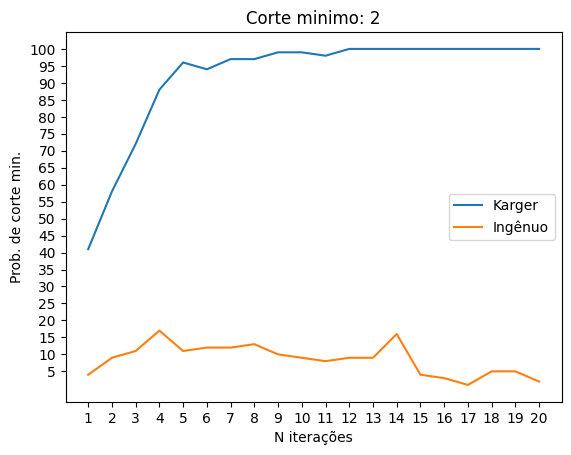

In [130]:
import matplotlib.pyplot as plt

# Dados das lista
y1 = lista_karger
y2 = lista_ingenuo
x = [i for i in range(1, n_iter+1)]

# Plotagem das curvas
plt.plot(x, y1, label='Karger')
plt.plot(x, y2, label='Ingênuo')

plt.xticks(range(1, n_iter+1, 1))
plt.yticks(range(5, 105, 5))

# Adicionando rótulos aos eixos
plt.xlabel('N iterações')
plt.ylabel('Prob. de corte min.')

# Adicionando uma legenda
plt.legend()
plt.title(f'Corte minimo: {corte_min}')

# Exibindo o gráfico
plt.show()
